# Intercambios internacionales

In [1]:
import $ivy.`org.apache.spark::spark-sql:2.4.3`


import org.apache.spark.sql._
import org.apache.spark.sql.functions._
import org.apache.spark.sql.expressions.Window



//Reducir numero logs
import org.apache.log4j.{Level, Logger}
Logger.getLogger("org").setLevel(Level.OFF)


//For adding extra dependenies
import $ivy.`org.typelevel::cats-core:1.6.0`

//Plotly
import $ivy.`org.plotly-scala::plotly-almond:0.8.3`
import plotly._, plotly.element._, plotly.layout._, plotly.Almond._


//Iniciamos session de Spark
val spark = {
  NotebookSparkSession.builder()
     .master("local[*]")
    //.config("spark.executor.instances", "4") // Número de ejecutores
    //.config("spark.executor.memory", "4g") // Memoria por ejecutor
    //.config("spark.executor.cores", "2") // Núcleos por ejecutor
    //.config("spark.driver.memory", "4g") // Memoria del driver
    //.config("spark.sql.shuffle.partitions", "8") // Número de particiones para operaciones de shuffle
    .getOrCreate()
}
import spark.implicits._

Loading spark-stubs

Creating SparkSession

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties


Spark UI

import $ivy.$
import org.apache.spark.sql._
import org.apache.spark.sql.functions._
import org.apache.spark.sql.expressions.Window
import org.apache.log4j.{Level, Logger}
import $ivy.$
import $ivy.$
import plotly._, plotly.element._, plotly.layout._, plotly.Almond._


//Iniciamos session de Spark

spark: SparkSession = org.apache.spark.sql.SparkSession@3b1a66b0
import spark.implicits._

In [2]:
val dfIntercambios = spark.read
        .parquet("../../data/parquet/dsItercambiosFronteras14-24.parquet")

dfIntercambios: DataFrame = [Pais: string, TipoIntercambio: string ... 3 more fields]

In [3]:
 dfIntercambios.show()

+-------+---------------+--------------------+--------+-------------------+
|   Pais|TipoIntercambio|          Porcentaje|   Valor|              Fecha|
+-------+---------------+--------------------+--------+-------------------+
|francia|    Exportación|0.040690692391790774| -2873.3|2022-01-01 01:00:00|
|francia|    Exportación| 0.03352963228112584| -2674.3|2022-01-02 01:00:00|
|francia|    Exportación|  0.0789662326013408| -6444.3|2022-01-03 01:00:00|
|francia|    Exportación|  0.7276761833404483|-41761.7|2022-01-04 01:00:00|
|francia|    Exportación|  0.8014993776168383|-42497.1|2022-01-05 01:00:00|
|francia|    Exportación|  0.7308582244652934|-40967.6|2022-01-06 01:00:00|
|francia|    Exportación|  0.5497382537741282|-33982.4|2022-01-07 01:00:00|
|francia|    Exportación|  0.1586140723335776|-10497.0|2022-01-08 01:00:00|
|francia|    Exportación|  0.9295050738441702|-64164.2|2022-01-09 01:00:00|
|francia|    Exportación|  0.8685587806707862|-58234.0|2022-01-10 01:00:00|
|francia|   

### Valores totales importación/exportación

In [4]:
dfIntercambios
    .groupBy("TipoIntercambio")
    .agg(sum("Valor").as("ValorTotal"))
    .withColumn("Valor", round($"ValorTotal"/1e6,3))
    //.select("TipoIntercambio", "Valor")
    .show()

+---------------+--------------------+--------+
|TipoIntercambio|          ValorTotal|   Valor|
+---------------+--------------------+--------+
|    Importación|1.9669334245000002E8| 196.693|
|          saldo|  -9458417.244000006|  -9.458|
|    Exportación|-2.06151759693999...|-206.152|
+---------------+--------------------+--------+



In [5]:
dfIntercambios
    .withColumn("Año",date_format(col("Fecha"), "yyyy"))
    .filter($"TipoIntercambio" === "Exportación")
    .filter($"Año" !== "2025")
    .groupBy($"Año")
    .agg(sum("Valor").as("ValorTotal"))
    .select($"Año", $"ValorTotal")
    .orderBy("Año")
    .show()

cmd5.sc:4: method !== in class Column is deprecated (since 2.0.0): !== does not have the same precedence as ===, use =!= instead
    .filter($"Año" !== "2025")
                   ^


+----+--------------------+
| Año|          ValorTotal|
+----+--------------------+
|2014|-1.315336839999999E7|
|2015|-1.18093597999999...|
|2016|-1.27704695999999...|
|2017|-1.37444278999999...|
|2018|-1.08897391000000...|
|2019|-1.38818913999999...|
|2020|-1.724798569999999E7|
|2021|-2.015531770000001E7|
|2022|-3.14567561670000...|
|2023|-2.963316771200001E7|
|2024|-2.958681193999999E7|
+----+--------------------+



cmd6.sc:5: method !== in class Column is deprecated (since 2.0.0): !== does not have the same precedence as ===, use =!= instead
    .filter($"Año" !== "2025")
                   ^
cmd6.sc:39: method apply in object Marker is deprecated (since 0.8.0): Use Marker() and chain-call .with* methods on it instead
        marker = Marker(color = Color.RGBA(0, 102, 255, 0.6))
                 ^
cmd6.sc:35: method apply in object Bar is deprecated (since 0.8.0): Use Bar() and chain-call .with* methods on it instead
    val traceImportacion = Bar(
                           ^
cmd6.sc:46: method apply in object Marker is deprecated (since 0.8.0): Use Marker() and chain-call .with* methods on it instead
        marker = Marker(color = Color.RGBA(255, 102, 0, 0.6))
                 ^
cmd6.sc:42: method apply in object Bar is deprecated (since 0.8.0): Use Bar() and chain-call .with* methods on it instead
    val traceExportacion = Bar(
                           ^
cmd6.sc:53: method apply in object 

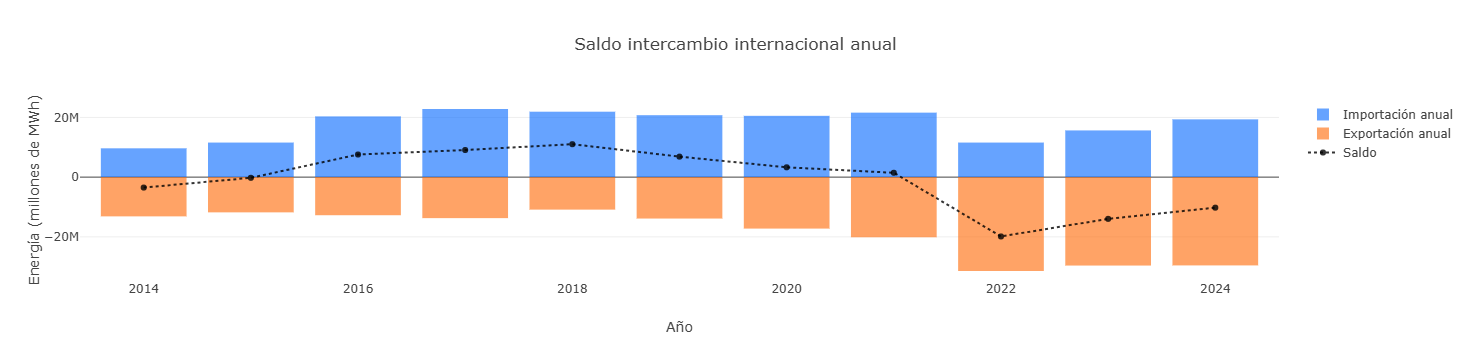

defined function analisisAnual

In [6]:
def analisisAnual(dfInt: DataFrame): Unit = {
    
    val df = dfInt
    .withColumn("Año",date_format(col("Fecha"), "yyyy"))
    .filter($"Año" !== "2025")
    .groupBy($"TipoIntercambio",$"Año")
    .agg(sum("Valor").as("ValorTotal"))
    .select($"Año",$"TipoIntercambio", $"ValorTotal")
    .orderBy("Año")
    
    val años = df.select("Año").distinct().orderBy("Año").as[String].collect.toSeq

    
    val seqImportacion = df
        .filter($"TipoIntercambio" === "Importación")
        .select("ValorTotal")
        .as[Double]
        .collect
        .toSeq
    val seqExportacion = df
        .filter($"TipoIntercambio" === "Exportación")
        .select("ValorTotal")
        .as[Double]
        .collect
        .toSeq

    val seqSaldo = df
        .filter($"TipoIntercambio" === "saldo")
        .select("ValorTotal")
        .as[Double]
        .collect
        .toSeq


    val traceImportacion = Bar(
        x = años,
        y = seqImportacion,
        name = "Importación anual",
        marker = Marker(color = Color.RGBA(0, 102, 255, 0.6))
    )

    val traceExportacion = Bar(
        x = años,
        y = seqExportacion,
        name = "Exportación anual",
        marker = Marker(color = Color.RGBA(255, 102, 0, 0.6))
    )

    val traceSaldo = Scatter(
            años, 
            seqSaldo, 
            name = "Saldo",
            line = Line(dash = Dash.Dot, color = Color.RGBA(0, 0, 0, 0.8)) 
    )

    val layout = Layout(
        title = "Saldo intercambio internacional anual",
        barmode = BarMode.Relative, // Ahora las barras se muestran correctamente en positivo y negativo
        xaxis = Axis(title = "Año"),
        yaxis = Axis(title = "Energía (millones de MWh)")
    )
    val data = Seq(traceImportacion, traceExportacion, traceSaldo)
    plot(data, layout)
}
analisisAnual(dfIntercambios)

cmd7.sc:33: method apply in object Scatter is deprecated (since 0.8.0): Use Scatter() and chain-call .with* methods on it instead
    val traceFrancia = Scatter(meses, saldoFrancia, name = "Francia")
                       ^
cmd7.sc:34: method apply in object Scatter is deprecated (since 0.8.0): Use Scatter() and chain-call .with* methods on it instead
    val traceAndorra = Scatter(meses, saldoAndorra, name = "Andorra")
                       ^
cmd7.sc:35: method apply in object Scatter is deprecated (since 0.8.0): Use Scatter() and chain-call .with* methods on it instead
    val tracePortugal = Scatter(meses, saldoPortugal, name = "Portugal")
                        ^
cmd7.sc:36: method apply in object Scatter is deprecated (since 0.8.0): Use Scatter() and chain-call .with* methods on it instead
    val traceMarruecos = Scatter(meses, saldoMarruecos, name = "Marruecos")
                         ^
cmd7.sc:42: method apply in object Axis is deprecated (since 0.8.0): Use Axis() and chai

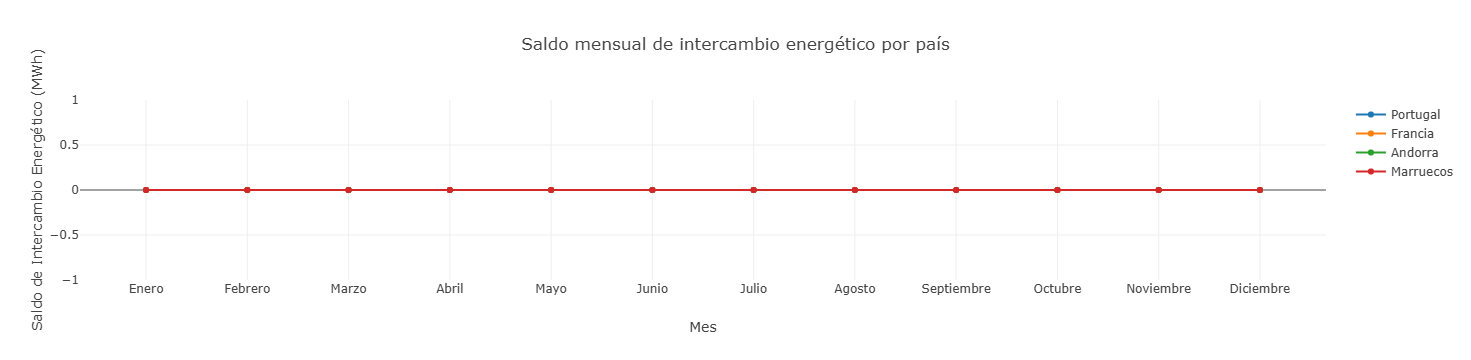

defined function evolucionSaldoPorPais

In [7]:
def evolucionSaldoPorPais(): Unit = {

    val dfFiltrado = dfIntercambios
        .filter($"TipoIntercambio" === "saldo")
        .withColumn("Año", date_format(col("Fecha"), "yyyy"))
        .filter($"Año" === "2024")
        .withColumn("Mes", date_format(col("Fecha"), "MMMM")) // Convertir a nombre del mes
        .groupBy($"Pais", $"Mes")
        .agg(sum("Valor").as("Valor saldo"))
        .withColumn("Saldo", round($"Valor saldo", 2))
        .select($"Pais", $"Mes", $"Saldo")
        .orderBy("Mes")

    // Lista de meses en orden correcto
    val meses = Seq("Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre")

    // Función para obtener los valores de saldo asegurando 12 valores
    def getSaldoPorPais(pais: String): Seq[Double] = {
        meses.map(mes =>
            dfFiltrado.filter($"Pais" === pais && $"Mes" === mes)
              .select("Saldo").as[Double]
              .collect().headOption.getOrElse(0.0) // Si no hay datos, usa 0.0
        )
    }

    // Obtener saldos para cada país con la función corregida
    val saldoFrancia = getSaldoPorPais("francia")
    val saldoAndorra = getSaldoPorPais("andorra")
    val saldoPortugal = getSaldoPorPais("portugal")
    val saldoMarruecos = getSaldoPorPais("marruecos")

    // Crear las trazas para cada país
    val traceFrancia = Scatter(meses, saldoFrancia, name = "Francia")
    val traceAndorra = Scatter(meses, saldoAndorra, name = "Andorra")
    val tracePortugal = Scatter(meses, saldoPortugal, name = "Portugal")
    val traceMarruecos = Scatter(meses, saldoMarruecos, name = "Marruecos")

    // Configuración del diseño del gráfico
    val data = Seq(tracePortugal, traceFrancia, traceAndorra, traceMarruecos) 
    val layout = Layout(
      title = "Saldo mensual de intercambio energético por país",
      xaxis = Axis(title = "Mes"),
      yaxis = Axis(title = "Saldo de Intercambio Energético (MWh)"),
      showlegend = true
    )

    plot(data, layout)
}

// Llamar a la función corregida
evolucionSaldoPorPais()


cmd11.sc:6: method !== in class Column is deprecated (since 2.0.0): !== does not have the same precedence as ===, use =!= instead
    .filter($"Año" !== "2025")
                   ^
cmd11.sc:23: method apply in object Scatter is deprecated (since 0.8.0): Use Scatter() and chain-call .with* methods on it instead
    val traceFrancia = Scatter(años, saldoFrancia, name = "Francia")
                       ^
cmd11.sc:24: method apply in object Scatter is deprecated (since 0.8.0): Use Scatter() and chain-call .with* methods on it instead
    val traceAndorra = Scatter(años, saldoAndorra, name = "Andorra")
                       ^
cmd11.sc:25: method apply in object Scatter is deprecated (since 0.8.0): Use Scatter() and chain-call .with* methods on it instead
    val tracePortugal = Scatter(años, saldoPortugal, name = "Portugal")
                        ^
cmd11.sc:26: method apply in object Scatter is deprecated (since 0.8.0): Use Scatter() and chain-call .with* methods on it instead
    val 

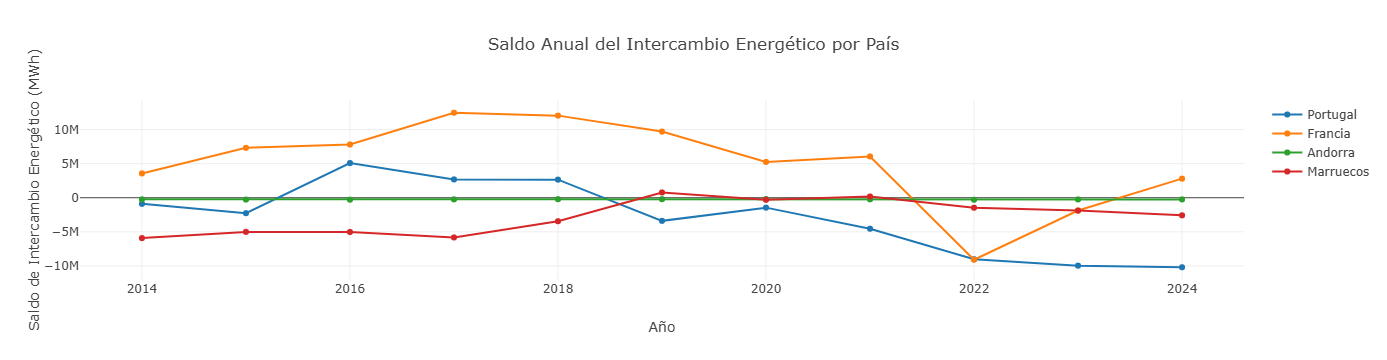

defined function evolucionSaldoPorPais
res11_1: String = "plot-27323d92-cb5a-401b-a2d9-d3132e8d5dd4"

In [11]:
def evolucionSaldoPorPais = {

    val dfFiltrado = dfIntercambios
    .filter($"TipoIntercambio" === "saldo")
    .withColumn("Año",date_format(col("Fecha"), "yyyy"))
    .filter($"Año" !== "2025")
    .groupBy($"Pais", $"Año")
    .agg(sum("Valor").as("Valor saldo"))
    .withColumn("Saldo", round($"Valor saldo",2))
    .select($"Pais", $"Año", $"Saldo")
    .orderBy("Año")
    
    // Extraer los datos del DataFrame
    val años = dfFiltrado.select("Año").distinct().orderBy("Año").as[String].collect.toSeq

    // Filtrar y extraer valores por país
    val saldoFrancia = dfFiltrado.filter($"Pais" === "francia").select("Saldo").as[Double].collect.toSeq
    val saldoAndorra = dfFiltrado.filter($"Pais" === "andorra").select("Saldo").as[Double].collect.toSeq
    val saldoPortugal = dfFiltrado.filter($"Pais" === "portugal").select("Saldo").as[Double].collect.toSeq
    val saldoMarruecos = dfFiltrado.filter($"Pais" === "marruecos").select("Saldo").as[Double].collect.toSeq

    // Crear las trazas para cada país
    val traceFrancia = Scatter(años, saldoFrancia, name = "Francia")
    val traceAndorra = Scatter(años, saldoAndorra, name = "Andorra")
    val tracePortugal = Scatter(años, saldoPortugal, name = "Portugal")
    val traceMarruecos = Scatter(años, saldoMarruecos, name = "Marruecos")

    // Configuración del diseño del gráfico
    
    val data = Seq(tracePortugal, traceFrancia, traceAndorra, traceMarruecos) 
    val layout = Layout(
      title = "Saldo Anual del Intercambio Energético por País",
      xaxis = Axis(title = "Año"),
      yaxis = Axis(title = "Saldo de Intercambio Energético (MWh)"),
      showlegend = true
    )

    // Renderizar el gráfico
    plot(data, layout)

}
evolucionSaldoPorPais

cmd10.sc:17: method apply in object Bar is deprecated (since 0.8.0): Use Bar() and chain-call .with* methods on it instead
    val barraImportacion = Bar(x = años, y = importaciones, name = s"Importación $pais")
                           ^
cmd10.sc:18: method apply in object Bar is deprecated (since 0.8.0): Use Bar() and chain-call .with* methods on it instead
    val barraExportacion = Bar(x = años, y = exportacionesEnPositivo, name = s"Exportación $pais")
                           ^
cmd10.sc:24: method apply in object Axis is deprecated (since 0.8.0): Use Axis() and chain-call .with* methods on it instead
      xaxis = Axis(title = "Año"),
              ^
cmd10.sc:25: method apply in object Axis is deprecated (since 0.8.0): Use Axis() and chain-call .with* methods on it instead
      yaxis = Axis(title = "Total Energía (MWh)"),
              ^
cmd10.sc:22: method apply in object Layout is deprecated (since 0.8.0): Use Layout() and chain-call .with* methods on it instead
    val lay

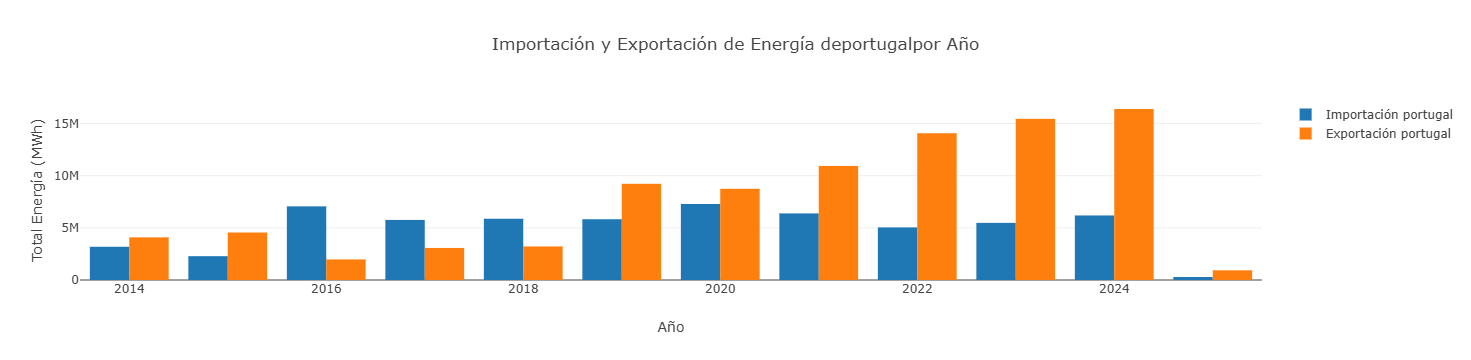

defined function importaciónVSexportacion

In [10]:
def importaciónVSexportacion(pais: String, df: DataFrame): Unit = {

    // Agrupar los datos por año y tipo de intercambio (Importación/Exportación)
    val dfAgrupado = df
      .filter($"Pais" === pais)
      .groupBy(date_format(col("Fecha"), "yyyy").as("Año"), $"TipoIntercambio")
      .agg(sum("Valor").as("TotalValor"))
      .orderBy("Año", "TipoIntercambio")

    val años = dfAgrupado.select("Año").distinct().orderBy("Año").as[String].collect.toSeq
    val importaciones = dfAgrupado.filter(col("TipoIntercambio") === "Importación").select("TotalValor").as[Double].collect.toSeq
    val exportaciones = dfAgrupado.filter(col("TipoIntercambio") === "Exportación").select("TotalValor").as[Double].collect.toSeq

    val exportacionesEnPositivo = exportaciones.map(valor => valor * -1)

    // Crear las barras para importación y exportación con valores absolutos
    val barraImportacion = Bar(x = años, y = importaciones, name = s"Importación $pais")
    val barraExportacion = Bar(x = años, y = exportacionesEnPositivo, name = s"Exportación $pais")

    // Definir los datos y el layout del gráfico
    val data = Seq(barraImportacion, barraExportacion)
    val layout = Layout(
      title = "Importación y Exportación de Energía de" +  pais + "por Año",
      xaxis = Axis(title = "Año"),
      yaxis = Axis(title = "Total Energía (MWh)"),
      barmode = BarMode.Group // Agrupar barras para compararlas lado a lado
    )

    // Generar el gráfico
    plot(data, layout)
}

importaciónVSexportacion("portugal", dfIntercambios )